<a href="https://colab.research.google.com/github/neermesh/deep-learning/blob/master/tensorflow_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
ls gdrive/My\ Drive

'Colab Notebooks'/      NSE-TATAGLOBAL.csv  'Untitled Jam'
'Getting started.pdf'   tatatest.csv


In [0]:
dataset_train = pd.read_csv('gdrive/My Drive/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:,1:2].values

In [0]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from tensorflow.keras import layers

In [0]:


regressor = tf.keras.Sequential()
#regressor.add(layers.Bidirectional(layers.CuDNNLSTM(256, return_sequences=True), 
#                               input_shape=(X_train.shape[1],1)))

regressor.add(layers.LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True))
regressor.add(layers.Dropout(0.2))


regressor.add(layers.LSTM(64, return_sequences=True))
regressor.add(layers.Dropout(0.2))

regressor.add(layers.LSTM(32, return_sequences=True))
regressor.add(layers.Dropout(0.2))


regressor.add(layers.LSTM(16, return_sequences=True))
regressor.add(layers.Dropout(0.2))


regressor.add(layers.LSTM(4, return_sequences=True))
regressor.add(layers.Dropout(0.2))

regressor.add(layers.LSTM(4, return_sequences=True))
regressor.add(layers.Dropout(0.2))

regressor.add(layers.Flatten())

regressor.add(layers.Dense(1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 60, 128)           66560     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 60, 64)            49408     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 64)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 32)            12416     
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 60, 16)           

In [1]:
regressor.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2)

NameError: ignored

In [0]:
dataset_test = pd.read_csv('gdrive/My Drive/tatatest.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,76):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

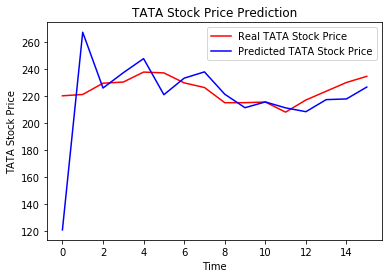

In [0]:


# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [0]:
pd.DataFrame({'real':real_stock_price.tolist(),'predicted':predicted_stock_price.tolist()})

,real,predicted
0,[220.1],[120.62557220458984]
1,[221.1],[267.25213623046875]
2,[229.45],[225.8735809326172]
3,[230.3],[237.22622680664062]
4,[237.7],[247.68357849121094]
5,[237.1],[220.92477416992188]
6,[229.7],[233.18719482421875]
7,[226.25],[237.84886169433594]
8,[215.0],[221.28431701660156]
9,[215.0],[211.2816162109375]
